![picture](https://drive.google.com/uc?id=1fKl1AgT3f2nW2h-44Ea7zmJa4qd7gHhy)

FalconCV is an open-source Python library that offers developers an interface to interact with some of the most popular computer vision frameworks, such as TensorFlow Object detection API and Detectron.
The main objective behind it is to unify the set of tools available and simplify the use of them. This library is focused mainly on Computer Vision practitioners but also is flexible enough to allow researchers to configure the models at a low-level.
Additionally, taking advantage of the fantastic features that OpenVINO offers, a custom model can be trained and optimized to run efficiently in the target hardware with just a few lines of code. It is important to say that FalconCV does not attempt to replace any of the tools mentioned previously; instead, it takes the best of them and offers a solution to improve accessibility to new users.

## Step 1: Install falconCV dependencies



In [0]:
!pip install matplotlib
!pip install numpy==1.17
!pip install opencv-contrib-python
!pip install pillow
!pip install cython
!pip install tqdm
!pip install scipy
!pip install requests 
!pip install clint
!pip install validators
!pip install more-itertools
!pip install pandas
!pip install imutils
!pip install boto3
!pip install "dask[complete]" 
!pip install lxml
!pip install Mako
!pip install colorlog
!pip install colorama
!pip install bs4
!pip install pick
!pip install -U scikit-learn
!pip install gitpython
!pip install cython
!pip install pycocotools
!pip install omegaconf
!pip install -U -f https://extras.wxpython.org/wxPython4/extras/linux/gtk3/ubuntu-16.04 wxPython
!pip install tf_slim
!sudo apt install protobuf-compiler

## Step 2: Check Tensorflow Version and GPU Support



In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Step 3: Install falconcv

In [0]:
!pip uninstall falconcv -y && pip install git+https://github.com/haruiz/FalconCV.git

In [0]:
import os
from falconcv.models.tf import ModelZoo
from falconcv.ds import *
from falconcv.util import FileUtil, VIUtil, ColorUtil, ImageUtil
from falconcv.models import ModelBuilder

## Step 4: Make Dataset
FalconCV offer different alternatives to create custom datasets; the user can download images from OpenImages or Coco dataset, or download images from Flicker or Bing




In [0]:
def create_dataset(images_folder, labels_map, n, batch_size):
    try:
        # creating dataset
        dataset = OpenImages(v=6)
        dataset.setup(split="train", task="detection")
        # labels = dataset.labels_map.values() # get valid labels
        os.makedirs(images_folder, exist_ok=True)
        FileUtil.clear_folder(images_folder)
        for batch_images in dataset.fetch(
                n=n,
                labels=list(labels_map.keys()),
                batch_size=batch_size):
            for img in batch_images:
                img.export(images_folder, labels_map)
                for region in img.regions:
                    pass
                    # print(region.shape_attributes["x"],
                    #       region.shape_attributes["y"])
    except Exception as ex:
        print("error creating the dataset {} ".format(ex))


## Step 5: Select the model


In [0]:
available_models = ModelZoo.available_models(arch="faster")
print(available_models)

## Step 6: Train the model

In [0]:
def train_model(model_name, images_folder, labels_map, epochs=5000):
    try:
        config = {
            "model": model_name,
            "images_folder": images_folder
        }
        with ModelBuilder.build(config=config) as model:
            model.train(epochs=epochs, val_split=0.3, clear_folder=True)
            model.freeze(epochs)
    except Exception as ex:
        raise Exception("Error training the model {} ".format(ex)) from ex

## Step 7: Make predictions

In [0]:
%matplotlib inline
def make_predictions(frozen_model, labels_map_file, image):    
    # load freeze model
    with ModelBuilder.build(frozen_model, labels_map_file) as model:
        image, predictions = model.predict(image, threshold=0.7)
        fig = VIUtil.imshow(image, predictions)
        fig.savefig('result.png', dpi=300, bbox_inches='tight')          

## Step 8: Run Pipeline

In [0]:
labels_map = { 
    "Eagle": 1,
    "Falcon": 2
}
images_folder = "images"
# create the dataset
create_dataset(images_folder, labels_map, n=1000, batch_size=250)
# train model
train_model("faster_rcnn_inception_v2_coco", images_folder, labels_map)

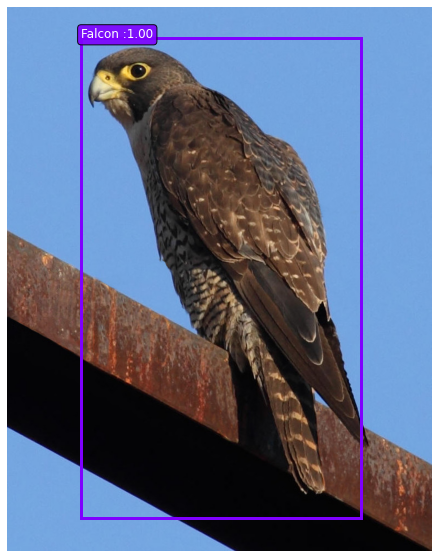

In [8]:
from pathlib import Path
frozen_model_file = list(Path("./models").rglob("frozen_inference_graph.pb"))[0]
labels_map = list(Path("./models").rglob("label_map.pbtxt"))[0]
make_predictions(str(frozen_model_file), str(labels_map), "https://upload.wikimedia.org/wikipedia/commons/9/9a/Falco_peregrinus_good_-_Christopher_Watson.jpg")